In [17]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, permutations, zip_longest, product, pairwise
import random

In [22]:
color_data = {
    'maroon': 1,
    'darkorange': 2,
    'yellow': 3,
    'forestgreen': 4,
    'deepskyblue': 5,
    'blue': 6,
    'darkviolet': 7,
    'cyan': 8,
    'crimson': 9, 
    'black': 10,
    'dodgerblue': 11,
    'deeppink': 12,
    'teal': 13,
    'olive': 14,
    'fuchsia': 15,
    'khaki': 16
}

c_batch_1 = {
    'deepskyblue': 5,
    'blue': 6,
    'darkviolet': 7,
    'cyan': 8,
    'dodgerblue': 11,
    'darkviolet': 7,
    # 'teal': 13,

}

c_batch_2 = {
    'maroon': 1,
    'darkorange': 2,
    'yellow': 3,
    'crimson': 9, 
    'fuchsia': 15,
    'khaki': 16,
    # 'black': 10,
}


In [25]:
c_batch_2 = {
    (65, 105, 225): 9,  # royalblue
    (0, 0, 205): 10,  # mediumblue
    (0, 0, 128): 11,  # navy
    (0, 0, 139): 12,  # darkblue
    (25, 25, 112): 13,  # midnightblue
    (138, 43, 226): 14,  # blueviolet
    (75, 0, 130): 15  # indigo
}
c_batch_1 = {
    '#7cfc00': 16,  # lawngreen
    '#00ff00': 17,  # lime
    '#008000': 18,  # green
    '#228b22': 19,  # forestgreen
    '#006400': 20,  # darkgreen
    '#adff2f': 21,  # greenyellow
    '#6b8e23': 22  # olivedrab
}

In [26]:
def permutated_colors(color_batch: dict, r: int = None) -> list[list]:
    if not r:
        r = len(color_batch)
    
    c_1 = list(color_batch.keys())
    
    color_combos_1 = list(permutations(c_1, r=r))
    random.shuffle(color_combos_1)

    return [list(el) for el in color_combos_1]


def batch_permutation_union(perm_colors_1: list[list], perm_colors_2: list[list]) -> list[list]:
    final_permutation_table = []
    for c_1 in perm_colors_1:
        for c_2 in perm_colors_2:
            color_row = [
                elem for pair in zip_longest(c_1, c_2)
                for elem in pair if elem is not None
            ]
            # color_row = c_1 + c_2
            final_permutation_table.append(color_row)
    
    random.shuffle(final_permutation_table)
    
    return final_permutation_table

In [29]:
c_1 = permutated_colors(c_batch_1, 2)
c_2 = permutated_colors(c_batch_2, 2)

# c_1_check = sorted(['-'.join(el) for el in c_1])
# c_2_check = sorted(['-'.join(el) for el in c_2])

# a = len(c_1_check) == len(set(c_1_check))
# b = len(c_2_check) == len(set(c_2_check))
# print(a, b)

color_combos = batch_permutation_union(c_1, c_2)

# colors = ['-'.join(el) for el in color_combos]

# a = len(colors) == len(set(colors))
# print(a)

for idx, el in enumerate(sorted(color_combos), start=1):
    print(f'{idx}. {el}')

1. [(0, 100, 0), (0, 0, 128), (0, 128, 0), (0, 0, 139)]
2. [(0, 100, 0), (0, 0, 128), (0, 128, 0), (0, 0, 205)]
3. [(0, 100, 0), (0, 0, 128), (0, 128, 0), (25, 25, 112)]
4. [(0, 100, 0), (0, 0, 128), (0, 128, 0), (65, 105, 225)]
5. [(0, 100, 0), (0, 0, 128), (0, 128, 0), (75, 0, 130)]
6. [(0, 100, 0), (0, 0, 128), (0, 128, 0), (138, 43, 226)]
7. [(0, 100, 0), (0, 0, 128), (0, 255, 0), (0, 0, 139)]
8. [(0, 100, 0), (0, 0, 128), (0, 255, 0), (0, 0, 205)]
9. [(0, 100, 0), (0, 0, 128), (0, 255, 0), (25, 25, 112)]
10. [(0, 100, 0), (0, 0, 128), (0, 255, 0), (65, 105, 225)]
11. [(0, 100, 0), (0, 0, 128), (0, 255, 0), (75, 0, 130)]
12. [(0, 100, 0), (0, 0, 128), (0, 255, 0), (138, 43, 226)]
13. [(0, 100, 0), (0, 0, 128), (34, 139, 34), (0, 0, 139)]
14. [(0, 100, 0), (0, 0, 128), (34, 139, 34), (0, 0, 205)]
15. [(0, 100, 0), (0, 0, 128), (34, 139, 34), (25, 25, 112)]
16. [(0, 100, 0), (0, 0, 128), (34, 139, 34), (65, 105, 225)]
17. [(0, 100, 0), (0, 0, 128), (34, 139, 34), (75, 0, 130)]
18. [(

Number of color combinations: 1764
Max r for square: 11.0
Half width: 7.7781745930520225. Full width: 15.556349186104045
Num big squares: 36. Num all squares: 360


ValueError: (124, 252, 0) is not a valid value for color

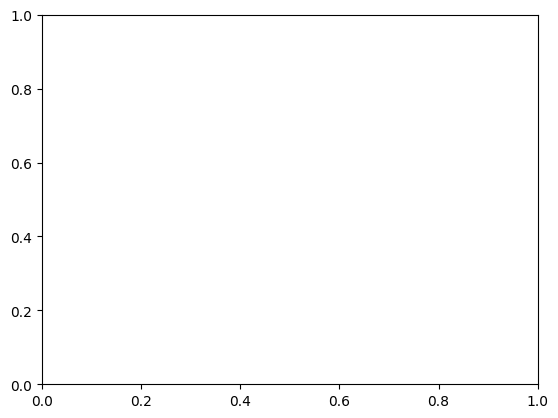

In [30]:
num_color_combos = len(color_combos)
colors = list(c_batch_1.keys()) + list(c_batch_2.keys())
# print(color_combos)
print(f'Number of color combinations: {num_color_combos}')


def sqr_coordinates(r = 1):
    '''r is a half diagonal of a square. Based on that we can calculate all the coordinates to build the square'''
    coord_options = [-r / np.sqrt(2), r / np.sqrt(2)]
    line_coords_raw = list(product(coord_options, repeat=2))
    sorted_coords = sorted(line_coords_raw, key=lambda item: (item[0], -item[1]) if item[0] < 0 else item)
    sorted_coords.append(sorted_coords[0]) # connecting the first and last dots

    return list(pairwise(sorted_coords)) # pair of coordinates

def convert_to_plot_coords(standard_coords: list[tuple]) -> list[list[list]]:
    '''Convert [(x1,y1), (x2,y2)] to [[x1,x2], [y1,y2]] type'''
    final_coords = []
    for coord in standard_coords:
        x_coords = [el[0] for el in coord]
        y_coords = [el[1] for el in coord]
        final_coords.append([x_coords, y_coords])
    
    return final_coords

def shift_coords(plot_coords: list[list[list]], x_shift, y_shift):
    '''Shifting prepared for plot coords by x and y'''
    final_coords = []
    for coord in plot_coords:
        x_coords = [el+x_shift for el in coord[0]]
        y_coords = [el+y_shift for el in coord[1]]
        final_coords.append([x_coords, y_coords])
    
    return final_coords

num_rows = 6
num_cols = 6
num_big_squares = num_rows * num_cols

row_col_idx = [(row, col) for row in range(num_rows) for col in range(num_cols)]

r_init = 1
r_fact = 1.1
num_internal_sqr = 10
num_all_squares = num_internal_sqr * num_big_squares

max_r = r_init*r_fact*num_internal_sqr
half_width  = max_r / np.sqrt(2)
full_width = half_width * 2
xy_delta = r_init*r_fact
print(f'Max r for square: {max_r}')
print(f'Half width: {half_width}. Full width: {full_width}')
print(f'Num big squares: {num_big_squares}. Num all squares: {num_all_squares}')

for color in colors:
    for el_idx, grid in enumerate(row_col_idx):
        for sqr_idx in range(1, num_internal_sqr+1):
            full_idx = el_idx * num_internal_sqr + sqr_idx - 1
            color_combo = color_combos[full_idx]
            if color not in color_combo:
                continue
            index_of_color = color_combo.index(color)
            r = r_init*r_fact*sqr_idx
            a = sqr_coordinates(r=r)
            adapted_coords = convert_to_plot_coords(a)
            shifted_coords = shift_coords(
                adapted_coords,
                x_shift=grid[0]*(full_width+xy_delta),
                y_shift=grid[1]*(full_width+xy_delta)
            )
            side_coords = shifted_coords[index_of_color]
            plt.plot(side_coords[0], side_coords[1], color=color, linewidth=1)
    plt.axis('off')
    plt.axis([-half_width-xy_delta, full_width*(num_cols-1)+half_width+xy_delta*num_cols, -half_width-xy_delta, full_width*(num_rows-1)+half_width+xy_delta*num_cols])
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(15, 15)
    plt.savefig(f'sqr_color/{color}_sqr.svg')
    plt.show()


ValueError: (122, 122, 122) is not a valid value for color

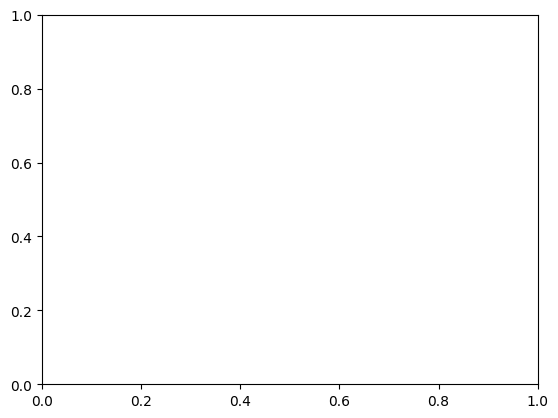

In [34]:
thetas = np.linspace(0, 2*np.pi, 1000)

plt.plot(np.cos(thetas), np.sin(thetas), color=(122,122,122))

plt.show()
